# Premiers pas en *pandas*

***
> __Auteur__: Joseph Salmon
> <joseph.salmon@umontpellier.fr>, adapté en francais du travail de Joris Van den Bossche:
https://github.com/jorisvandenbossche/pandas-tutorial/blob/master/01-pandas_introduction.ipynb

## Création d'un sommaire si besoin
<a id="sommaire"> </a>
### Sommaire

#### *  __[Introduction et présentation](#intro)__ <br>

<a id="intro"> </a>

## Introduction et présentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 8

In [2]:
%matplotlib notebook

## Cas 1: Survie sur le Titanic 
Si le package `download` est installé on l'utilisera ci-dessous, ce qui permettra de garder les données localement et de ne pas les re-télécharger quand on relance le notebook. Si le package `download` n'est pas installé on se servira directement de `pandas` (solution à éviter pour les fichiers volumineux).

In [3]:
try:
    from download import download
    url = "http://josephsalmon.eu/enseignement/datasets/titanic.csv"
    path_target = "./titanic.csv"
    download(url, path_target, replace=False)    
    # df est souvent utilisé comme acronyme de "data frame"
    df_titanic_raw = pd.read_csv("titanic.csv")
except ImportError:
    df_titanic_raw = pd.read_csv(url)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


In [4]:
df_titanic_raw.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...,...
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Valeurs manquantes (en: missing values)
Pour faciliter la suite on ne garde que les observations qui sont complètes, on enlève donc ici les valeurs manquantes

In [5]:
df_titanic = df_titanic_raw.dropna()
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


### Description succinte des variables:
- Survival - Survie (0 = Non; 1 = Oui).
- Pclass - Passenger Class / Classe du passager (1 = 1ere; 2 = 2nde; 3 = 3ème)
- Name - Nom
- Sex - Sexe
- Age - Age
- Sibsp - Nombre de frères / soeurs / maris / épouses à bord
- Parch - Nombre de parents ascendants / enfants à bord
- Ticket - Numéro du ticket
- Fare - Prix du ticket (British pound)
- Cabin - Cabine
- Embarked - Port d'embarquation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Commandes de statistiques descriptives:
- count - effectif
- mean - moyenne
- std (**st**andard **d**eviation - écart-type)


In [6]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


### Compréhension et visualisation de la base de données:

**Quelle est la répartition par âge des passagers?**

<IPython.core.display.Javascript object>


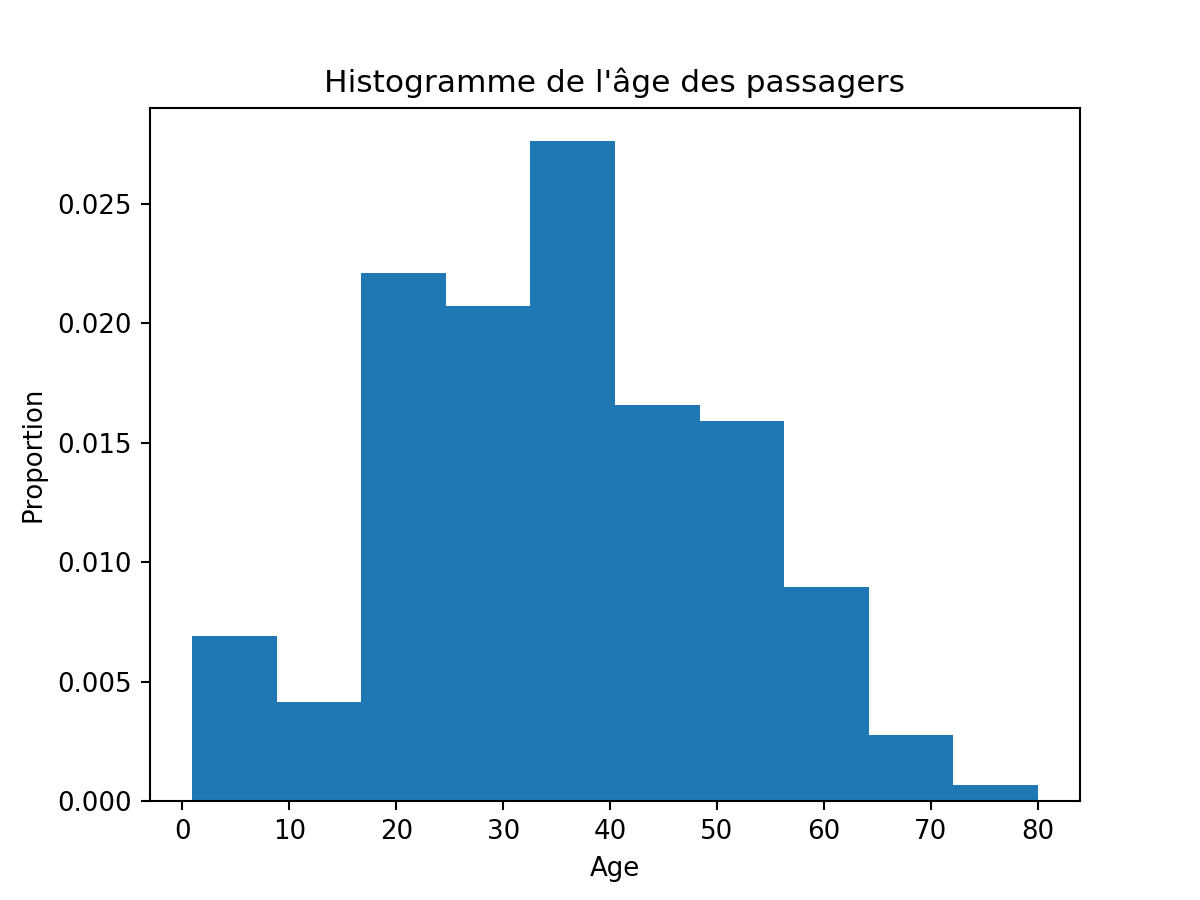

Text(0.5, 1.0, "Histogramme de l'âge des passagers")

In [7]:
plt.figure()
plt.hist(df_titanic['Age'], density=True)
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.title("Histogramme de l'âge des passagers")

<IPython.core.display.Javascript object>


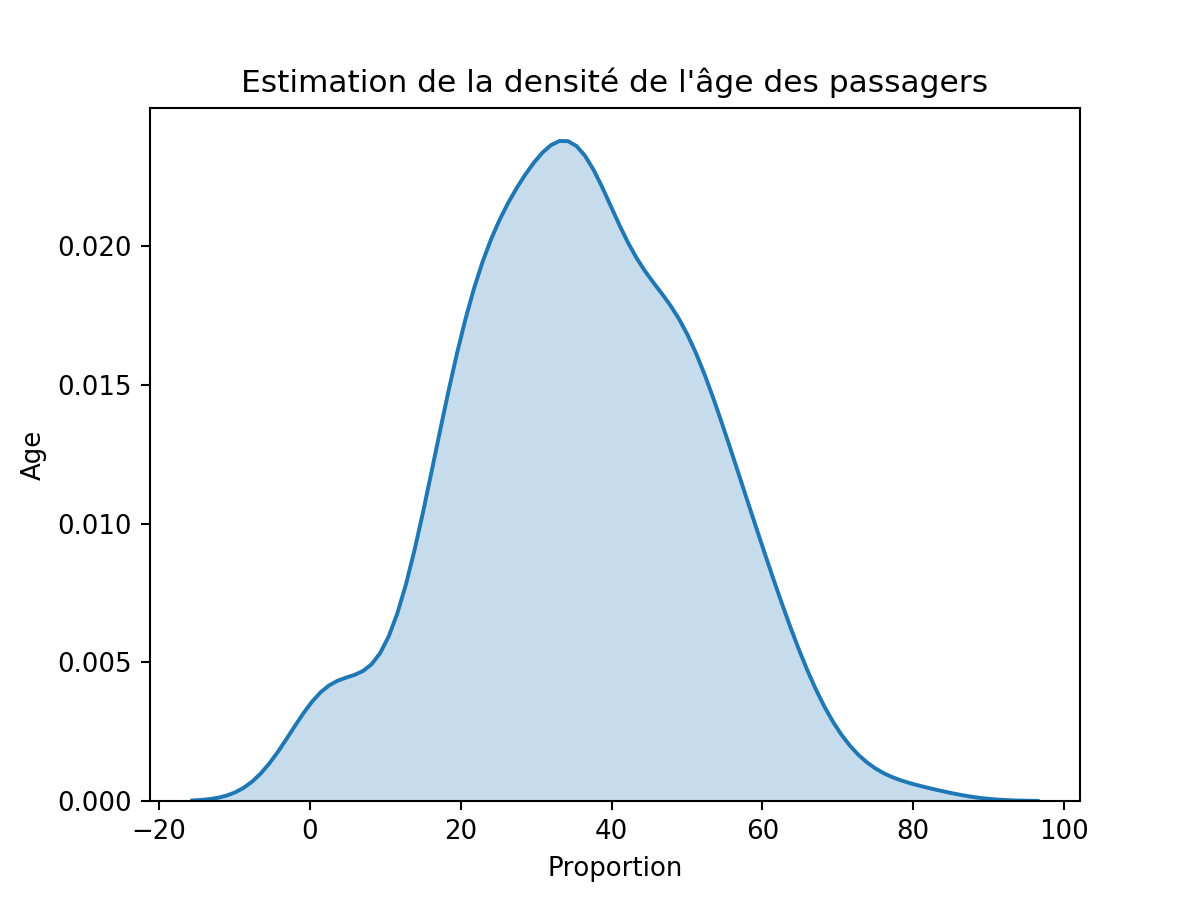

Text(0.5, 1.0, "Estimation de la densité de l'âge des passagers")

In [8]:
plt.figure()
ax = sns.kdeplot(df_titanic['Age'], shade=True)
plt.xlabel('Proportion')
plt.ylabel('Age')
ax.legend().set_visible(False)
plt.title("Estimation de la densité de l'âge des passagers")

**Comment le taux de survie des passagers diffère-t-il entre les sexes?**

In [9]:
df_titanic.groupby('Sex')[['Survived']].aggregate(lambda x: x.sum() / len(x))

,Survived
Sex,
female,0.931818
male,0.431579


**Comment le taux de survie des passagers diffère-t-il entre les différentes classes?**

<IPython.core.display.Javascript object>


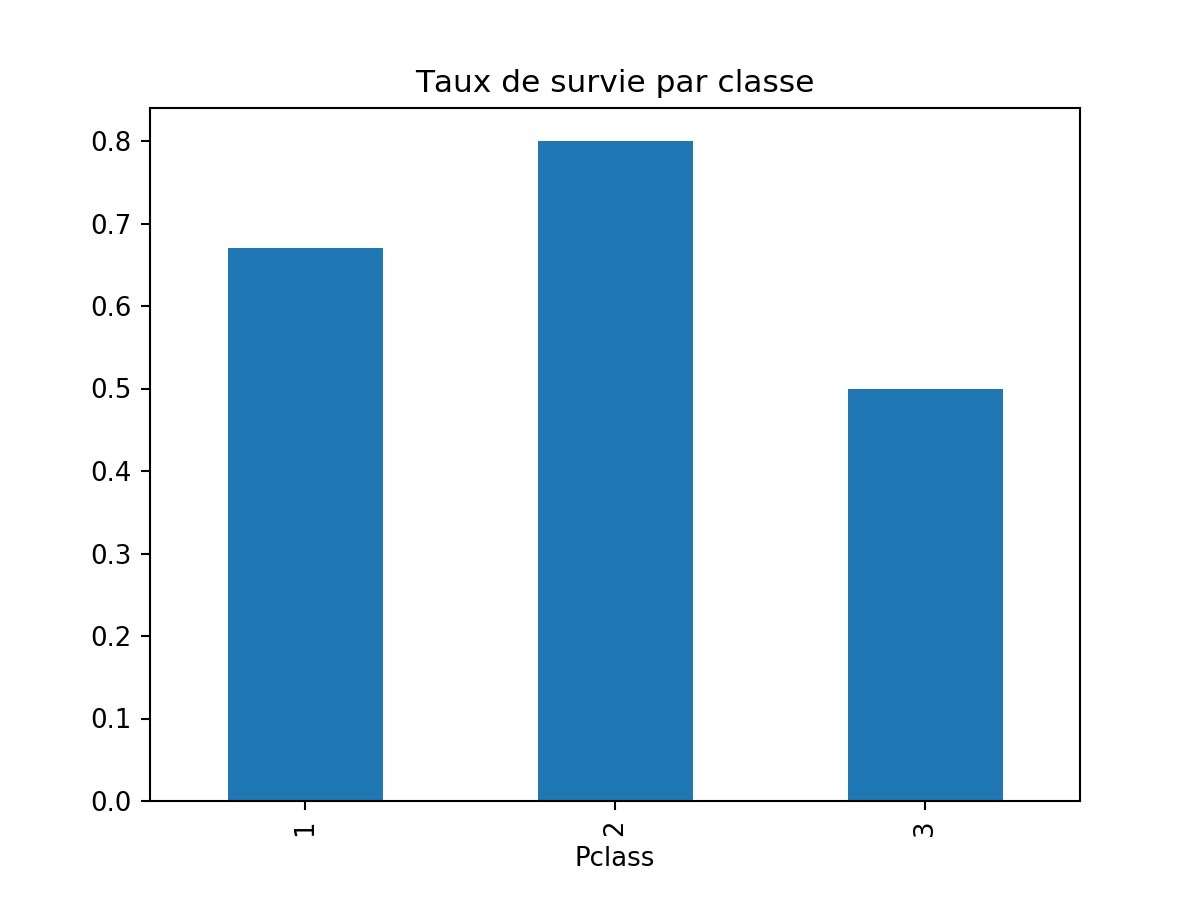

Text(0.5, 1.0, 'Taux de survie par classe')

In [10]:
plt.figure()
df_titanic.groupby('Pclass')['Survived'].aggregate(lambda x: x.sum() / len(x)).plot(kind='bar')
plt.title("Taux de survie par classe")

## Cas 2:  qualité de l'air
Pollution sur Paris au cours des années, Source: Airparif


In [11]:
url = "http://josephsalmon.eu/enseignement/datasets/20080421_20160927-PA13_auto.csv"
path_target = "./20080421_20160927-PA13_auto.csv"
download(url, path_target, replace=False)

Replace is False and data exists, so doing nothing. Use replace==True to re-download the data.


'./20080421_20160927-PA13_auto.csv'

In [12]:
polution_df = pd.read_csv('20080421_20160927-PA13_auto.csv', sep=';',
                          comment='#', na_values="n/d",
                          converters={'heure': str})
# check issues with 24:00:
# https://www.tutorialspoint.com/python/time_strptime.htm


# Pré-traitement:
polution_df['heure'] = polution_df['heure'].replace('24', '0')
time_improved = pd.to_datetime(polution_df['date'] +
                               ' ' + polution_df['heure'] + ':00',
                               format='%d/%m/%Y %H:%M')

polution_df['DateTime'] = time_improved
del polution_df['heure']
del polution_df['date']

polution_ts = polution_df.set_index(['DateTime'])
polution_ts = polution_ts.sort_index()
polution_ts.head()

,NO2,O3
DateTime,,
2008-04-21 00:00:00,28.0,36.0
2008-04-21 01:00:00,13.0,74.0
2008-04-21 02:00:00,11.0,73.0
2008-04-21 03:00:00,13.0,64.0
2008-04-21 04:00:00,23.0,46.0


In [13]:
polution_ts.describe()

,NO2,O3
count,71008.000000,71452.000000
mean,34.453414,39.610046
std,20.380702,28.837333
min,1.000000,0.000000
25%,19.000000,16.000000
50%,30.000000,38.000000
75%,46.000000,58.000000
max,167.000000,211.000000


<IPython.core.display.Javascript object>


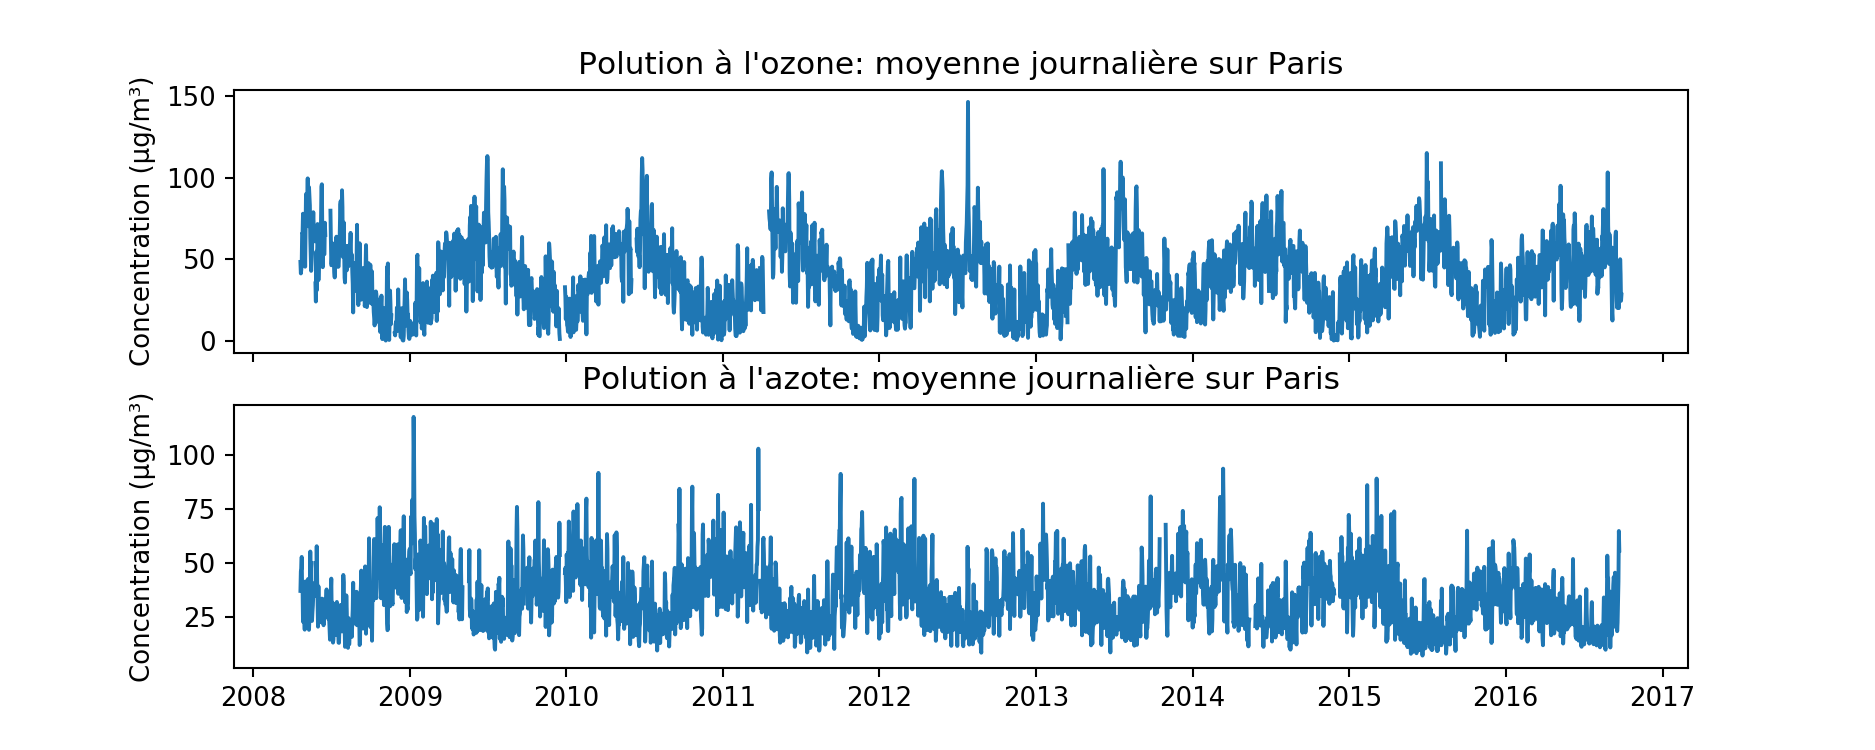

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

axes[0].plot(polution_ts['O3'].resample('D').mean())
axes[0].set_title("Polution à l'ozone: moyenne journalière sur Paris")
axes[0].set_ylabel("Concentration (µg/m³)")

axes[1].plot(polution_ts['NO2'].resample('D').mean())
axes[1].set_title("Polution à l'azote: moyenne journalière sur Paris")
axes[1].set_ylabel("Concentration (µg/m³)")

plt.show()

**La pollution atmosphérique montre-t-elle une tendance à la baisse au fil des ans?**

<IPython.core.display.Javascript object>


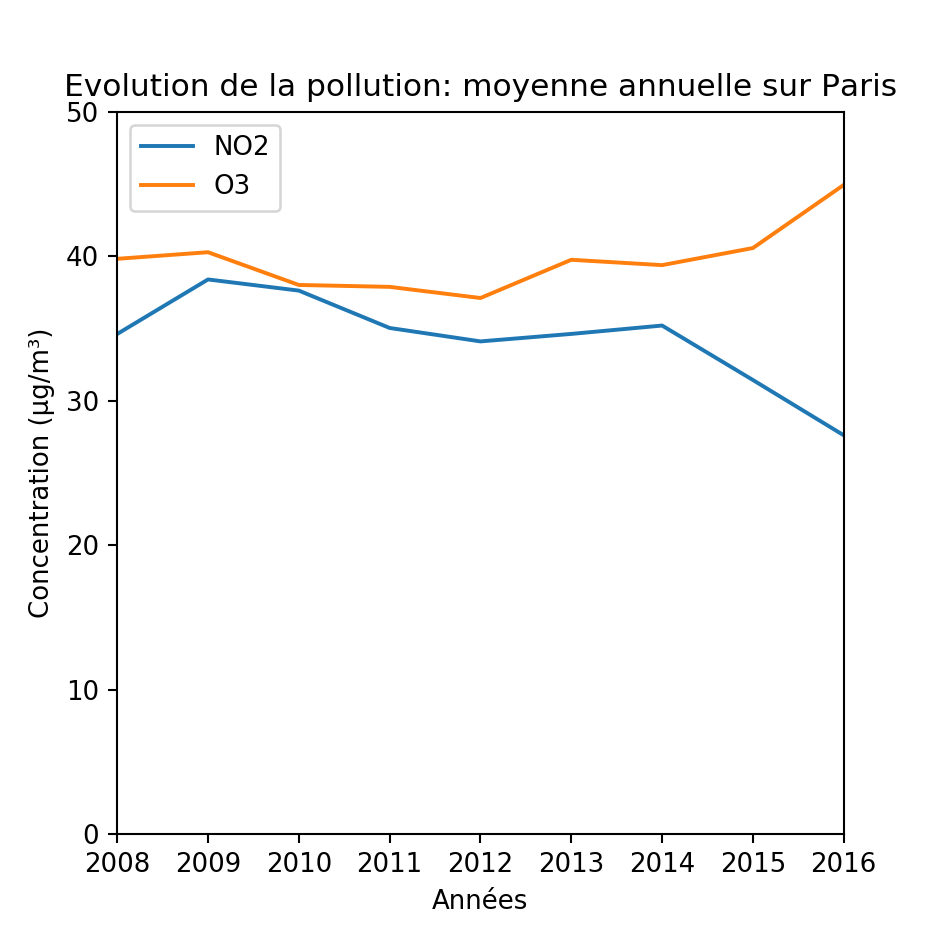

Text(0.5, 0, 'Années')

In [15]:
ax = polution_ts['2008':].resample('A').mean().plot(figsize=(5,5))  # échantillone par année (A pour Annual)
plt.ylim(0,50)
plt.title("Evolution de la pollution: moyenne annuelle sur Paris")
plt.ylabel("Concentration (µg/m³)")
plt.xlabel("Années")

<IPython.core.display.Javascript object>


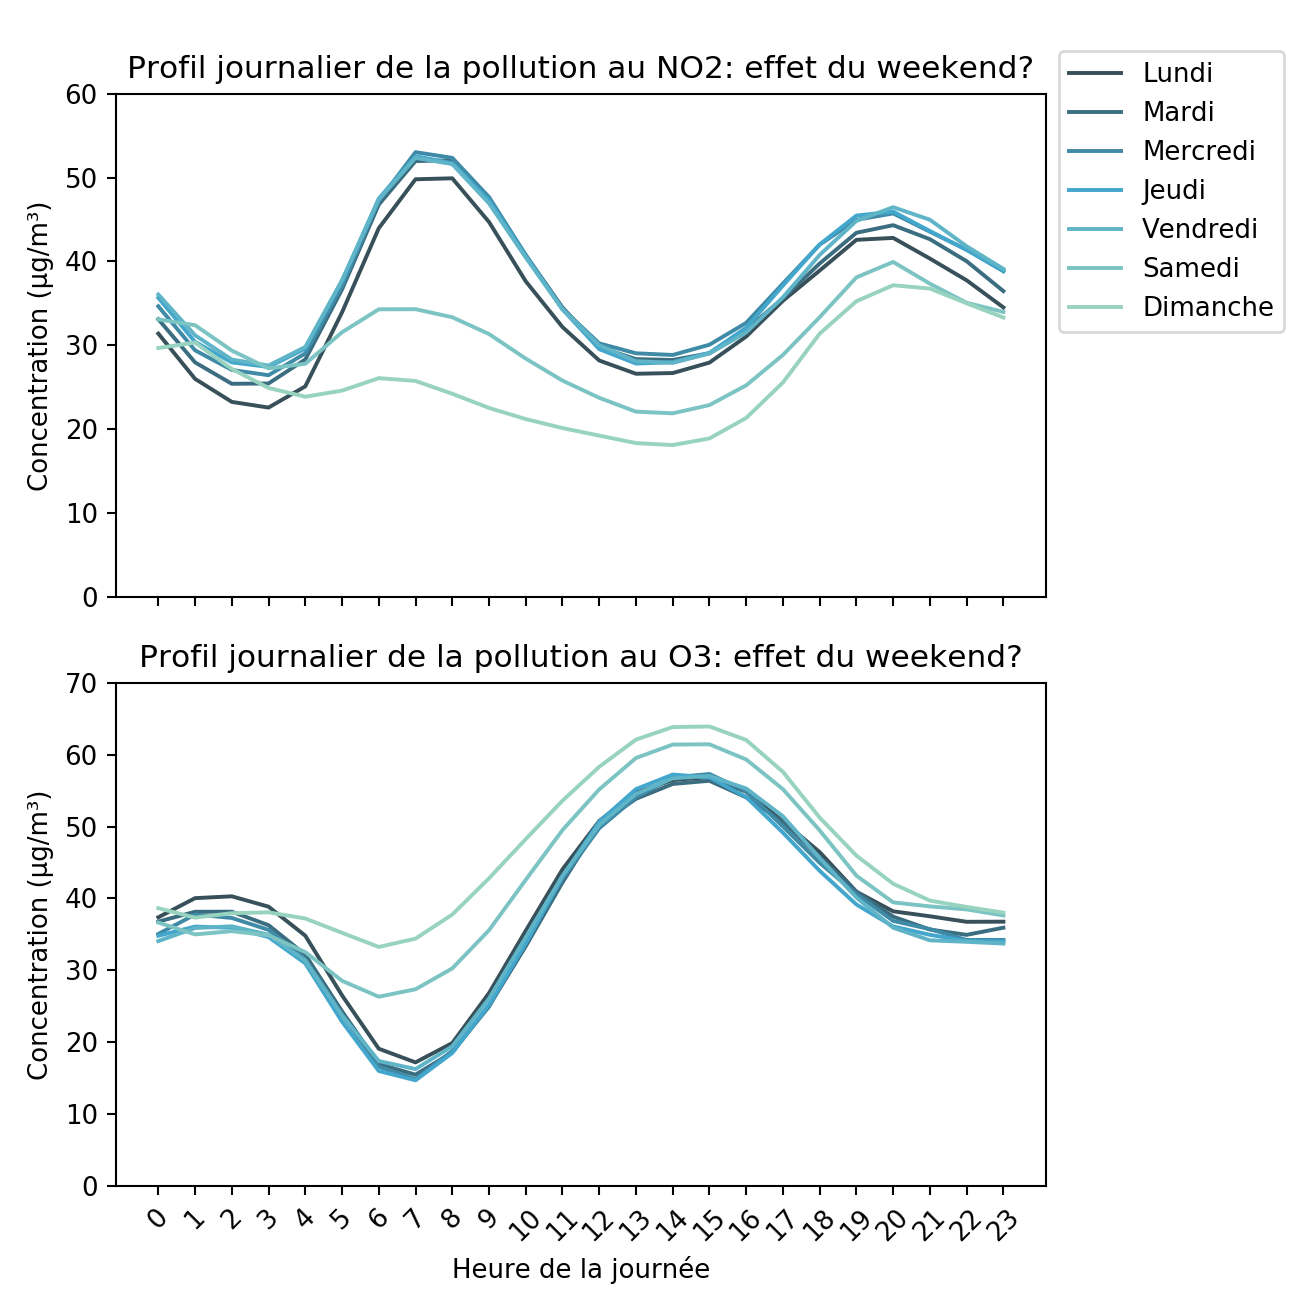

In [16]:
sns.set_palette("GnBu_d", n_colors=7)
polution_ts['weekday'] = polution_ts.index.weekday  # Monday=0, Sunday=6

# polution_ts['weekend'] = polution_ts['weekday'].isin([5, 6])

days = ['Lundi','Mardi', 'Mercredi','Jeudi','Vendredi','Samedi','Dimanche'] 

polution_week_no2 = polution_ts.groupby(['weekday', polution_ts.index.hour])['NO2'].mean().unstack(level=0)
polution_week_03 = polution_ts.groupby(['weekday', polution_ts.index.hour])['O3'].mean().unstack(level=0)


fig, axes = plt.subplots(2, 1, figsize=(7,7), sharex=True)

polution_week_no2.plot(ax=axes[0])
axes[0].set_ylabel("Concentration (µg/m³)")
axes[0].set_xlabel("Heure de la journée")
axes[0].set_title("Profil journalier de la pollution au NO2: effet du weekend?")
axes[0].set_xticks(np.arange(0,24))
axes[0].set_xticklabels(np.arange(0,24),rotation=45)
axes[0].set_ylim(0,60)

polution_week_03.plot(ax=axes[1])
axes[1].set_ylabel("Concentration (µg/m³)")
axes[1].set_xlabel("Heure de la journée")
axes[1].set_title("Profil journalier de la pollution au O3: effet du weekend?")
axes[1].set_xticks(np.arange(0,24))
axes[1].set_xticklabels(np.arange(0,24),rotation=45)
axes[1].set_ylim(0,70)
axes[1].legend().set_visible(False)
# ax.legend()
axes[0].legend(labels=days,loc='lower left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()

### EXERCICE: quid des saisons?

## Cas 3: *Titanic*, anlayser des données avec Pandas 

Pour les travaux intensifs en données en Python, la bibliothèque Pandas est devenue essentielle.

Qu'est ce que pandas? C'est un environnement qui gère des Data Frame:

- Pandas peut gérer *Data Frame* des tableaux *numpy* avec des étiquettes pour les lignes et les colonnes, et permet une prise en charge des types de données hétérogènes.
- Pandas peut aussi être considéré comme le data.frame de R en Python.
- Puissant pour travailler avec les données manquantes, travailler avec des données chronologiques, pour lire et écrire vos données, pour remodeler, regrouper, fusionner vos données, ...

Documentation: http://pandas.pydata.org/pandas-docs/stable/

Quand a-t-on besoin de Pandas?
Quand on travaille avec des tableaux ou des structures de données(commme des dataframe R, SQL table, Excel, Spreadsheet, ...):

- Importer des données
- Nettoyer des données "sales" 
- Explorer et comprendre des données
- Traiter et preparer les données pour faire une analyse 
- Analyser les données (avec en plus scikit-learn, statsmodels,...)
<br/>
<br/>

**ATTENTION / LIMITES:**

Pandas est bon pour travailler avec des données hétérogènes et des tableaux 1D/2D, mais tous les types de données ne correspondent pas à ces structures!

Contre-exemples:
- Quand on travaille avec des données de type **array** (e.g. images):  utiliser *numpy*
- Pour des données multidimensionnelles étiquetées  (e.g. données de climat): voir [xarray](http://xarray.pydata.org/en/stable/)

### Les structures de données en pandas : DataFrame et Series

Un DataFrame est une structure de données tabulaire (un objet multidimensionnel pouvant contenir des données étiquetées) composé de lignes et de colonnes, semblable à une feuille de calcul, une table de base de données ou à l'objet data.frame de R. Vous pouvez le considérer comme plusieurs objets Series partageant le même index.

In [17]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
df_titanic.index

Int64Index([  1,   3,   6,  10,  11,  21,  23,  27,  52,  54,
            ...
            835, 853, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=183)

In [19]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [20]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
                ...   
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Length: 12, dtype: object

In [21]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 23.6+ KB


In [22]:
df_titanic_raw.info() # on voit que c'est la variable cabine qui n'est pas bien renseigné, suit après l'âge

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
df_titanic.values # c'est la liste de valeur /array associé

array([[2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [4, 1, 1, ..., 53.1, 'C123', 'S'],
       [7, 0, 1, ..., 51.8625, 'E46', 'S'],
       ...,
       [880, 1, 1, ..., 83.1583, 'C50', 'C'],
       [888, 1, 1, ..., 30.0, 'B42', 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C']], dtype=object)

### Données uni-dimensionel : Series (une colonne d'un DataFrame)

Une Series est un support de base pour les données étiquetées unidimensionnelles.

In [24]:
fare = df_titanic['Fare']

In [25]:
fare

1      71.2833
3      53.1000
6      51.8625
10     16.7000
        ...   
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 183, dtype: float64

### Attributs de l'objet *Series*: indices et valeurs

In [26]:
fare.index

Int64Index([  1,   3,   6,  10,  11,  21,  23,  27,  52,  54,
            ...
            835, 853, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=183)

In [27]:
fare.values[:10]

array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,
        35.5   , 263.    ,  76.7292,  61.9792])

In [28]:
fare[6] # existe mais fare[0] provoque une erreur, car on l'a enlevé du dataFrame, comme valeur manquante.


51.8625

Contrairement au tableau *numpy*, cet index peut être autre chose qu'un entier:

In [29]:
df_titanic = df_titanic.set_index('Name')
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"McCarthy, Mr. Timothy J",7,0,1,male,54.0,0,0,17463,51.8625,E46,S
"Sandstrom, Miss. Marguerite Rut",11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...
"Carlsson, Mr. Frans Olof",873,0,1,male,33.0,0,0,695,5.0000,B51 B53 B55,S
"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",880,1,1,female,56.0,0,1,11767,83.1583,C50,C
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [30]:
age = df_titanic['Age']
age['Carlsson, Mr. Frans Olof']

33.0

In [31]:
age.mean()

35.6744262295082

In [32]:
df_titanic[age <2]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Becker, Master. Richard F",184,1,2,male,1.00,2,1,230136,39.00,F4,S
"Allison, Master. Hudson Trevor",306,1,1,male,0.92,1,2,113781,151.55,C22 C26,S


In [33]:
df_titanic_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
pd.options.display.max_rows = 70
df_titanic[df_titanic['Embarked']=='C']  # Les passagers montés à Cherbourg n'ont pas des noms gaulois...

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Harper, Mrs. Henry Sleeper (Myna Haxtun)",53,1,1,female,49.0,1,0,PC 17572,76.7292,D33,C
"Ostby, Mr. Engelhart Cornelius",55,0,1,male,65.0,0,1,113509,61.9792,B30,C
"Goldschmidt, Mr. George B",97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C
"Greenfield, Mr. William Bertram",98,1,1,male,23.0,0,1,PC 17759,63.3583,D10 D12,C
"Baxter, Mr. Quigg Edmond",119,0,1,male,24.0,0,1,PC 17558,247.5208,B58 B60,C
"Giglio, Mr. Victor",140,0,1,male,24.0,0,0,PC 17593,79.2000,B86,C
"Smith, Mr. James Clinch",175,0,1,male,56.0,0,0,17764,30.6958,A7,C
"Isham, Miss. Ann Elizabeth",178,0,1,female,50.0,0,0,PC 17595,28.7125,C49,C


In [35]:
pd.options.display.max_rows = 8

In [36]:
df_titanic_raw['Survived'].sum() / df_titanic_raw['Survived'].count()

0.3838383838383838

In [37]:
df_titanic['Survived'].sum() / df_titanic_raw['Survived'].count()

0.13804713804713806

** Quelle était la proportion de femmes sur le bateau? **

In [38]:
df_titanic_raw.groupby(['Sex']).size() / df_titanic_raw['Sex'].count()

Sex
female    0.352413
male      0.647587
dtype: float64

### Data import et export

Pandas supports nativement une large gamme de formats d'entrée / sortie:
- CSV, text
- SQL database
- Excel
- HDF5
- json
- html
- pickle
- sas, stata
- ...

In [39]:
# pd.read_csv?

### Exploration

In [40]:
df_titanic_raw.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [41]:
df_titanic_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### iloc

In [42]:
df_titanic.iloc[0:2,1:8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket
Name,,,,,,,
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,1,female,38.0,1,0,PC 17599
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1,0,113803


### loc

In [43]:
df_titanic.loc['Bonnell, Miss. Elizabeth', 'Fare']

26.55

In [44]:
df_titanic.loc['Bonnell, Miss. Elizabeth']

PassengerId        12
Survived            1
Pclass              1
Sex            female
                ...  
Ticket         113783
Fare            26.55
Cabin            C103
Embarked            S
Name: Bonnell, Miss. Elizabeth, Length: 11, dtype: object

In [45]:
df_titanic.loc['Bonnell, Miss. Elizabeth','Survived']= 100

In [46]:
df_titanic.loc['Bonnell, Miss. Elizabeth']

PassengerId        12
Survived          100
Pclass              1
Sex            female
                ...  
Ticket         113783
Fare            26.55
Cabin            C103
Embarked            S
Name: Bonnell, Miss. Elizabeth, Length: 11, dtype: object

In [47]:
df_titanic.loc['Bonnell, Miss. Elizabeth','Survived']= 1  # On remet la valeur comme avant 

### L'opération group-by:

In [48]:
df_titanic.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,461.818182,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900
male,449.389474,0.431579,1.168421,38.451789,0.400000,0.410526,69.124343


In [49]:
df_titanic_raw.groupby('Sex').mean()['Fare']

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

In [50]:
df_titanic['AgeClass'] = pd.cut(df_titanic['Age'], bins=np.arange(0,90,10)) # créer des classes / découpes.